In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np

from csbdeep.utils import normalize
from glob import glob
from skimage import io
from stardist.matching import matching_dataset
from stardist.models import StarDist2D
from tqdm import tqdm

from utils import show_test_images, taus

In [2]:
# Directories
image_dir = f'../images'
merfish_dir = f'{image_dir}/merfish'

In [3]:
# Read test images and masks, normalize test images, 8 images (20%) chosen for test
merfish_X_test_names = sorted(glob(f'{merfish_dir}/test/images/*.tif'))
merfish_X_test = [normalize(img, 1, 99.8, axis=(0, 1)) for img in list(map(io.imread, merfish_X_test_names))]
merfish_Y_test_names = sorted(glob(f'{merfish_dir}/test/masks/*.tif'))
merfish_Y_test = list(map(io.imread, merfish_Y_test_names))

In [4]:
# Load pretrained model for 2d fluorescent images
pretrained_stardist_model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [5]:
pretrained_stardist_merfish_Y_pred = [pretrained_stardist_model.predict_instances(x, n_tiles=pretrained_stardist_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [02:01<00:00, 15.23s/it]


In [6]:
pretrained_stardist_merfish_Y_pred_labels = [pred[0] for pred in pretrained_stardist_merfish_Y_pred]
pretrained_stardist_merfish_stats = [matching_dataset(merfish_Y_test, pretrained_stardist_merfish_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:18<00:00,  2.09s/it]


In [7]:
pretrained_stardist_merfish_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=843, tp=40, fn=3, precision=0.045300113250283124, recall=0.9302325581395349, accuracy=0.045146726862302484, f1=0.08639308855291576, n_true=43, n_pred=883, mean_true_score=0.5693592051568376, mean_matched_score=0.6120611455436004, panoptic_quality=0.052877852746747334, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=843, tp=40, fn=3, precision=0.045300113250283124, recall=0.9302325581395349, accuracy=0.045146726862302484, f1=0.08639308855291576, n_true=43, n_pred=883, mean_true_score=0.5693592051568376, mean_matched_score=0.6120611455436004, panoptic_quality=0.052877852746747334, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=844, tp=39, fn=4, precision=0.044167610419026046, recall=0.9069767441860465, accuracy=0.043968432919954906, f1=0.08423326133909287, n_true=43, n_pred=883, mean_true_score=0.5628197427416587, mean_matched_score=0.620544844561316, panoptic_quality=0.052270516064560096, by_image=Fals

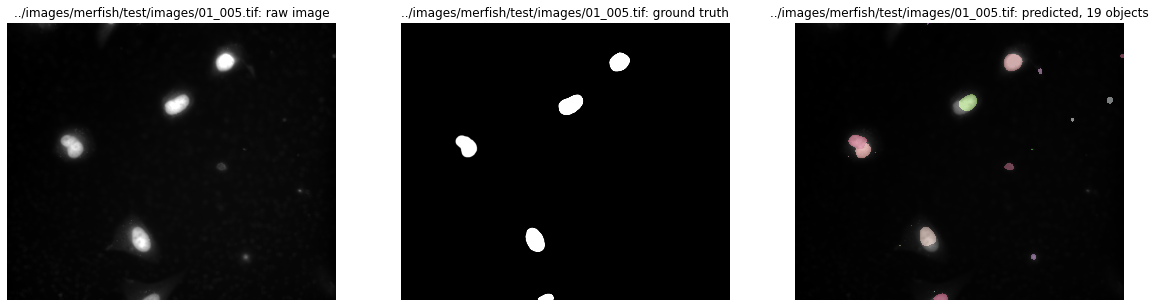

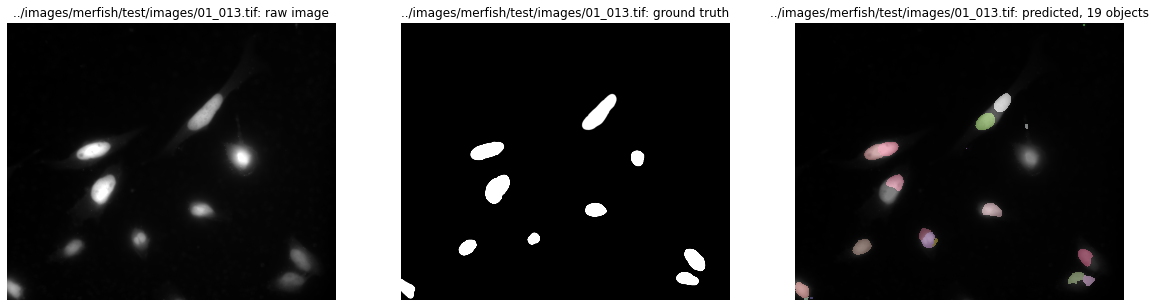

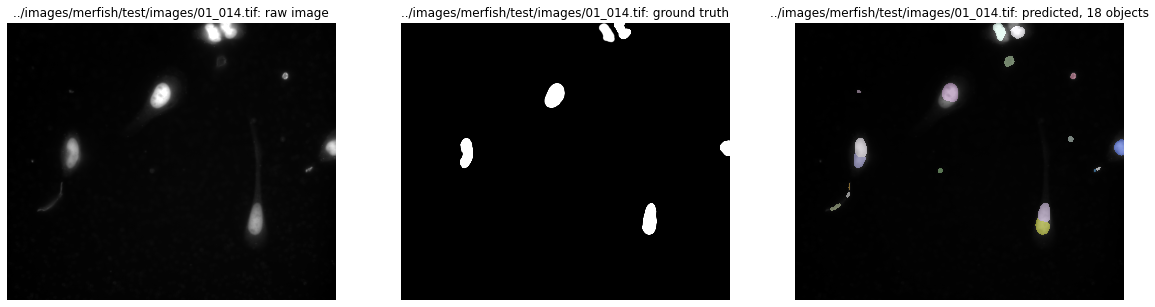

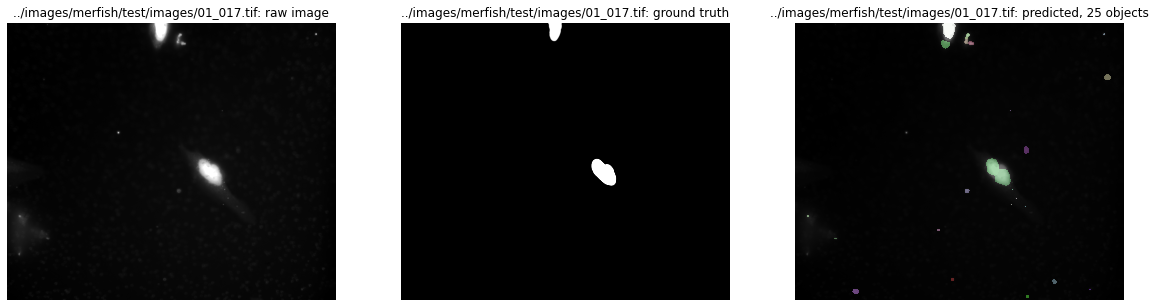

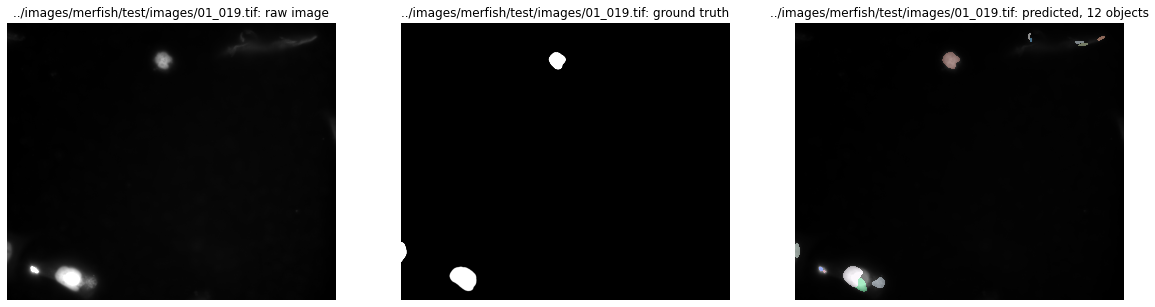

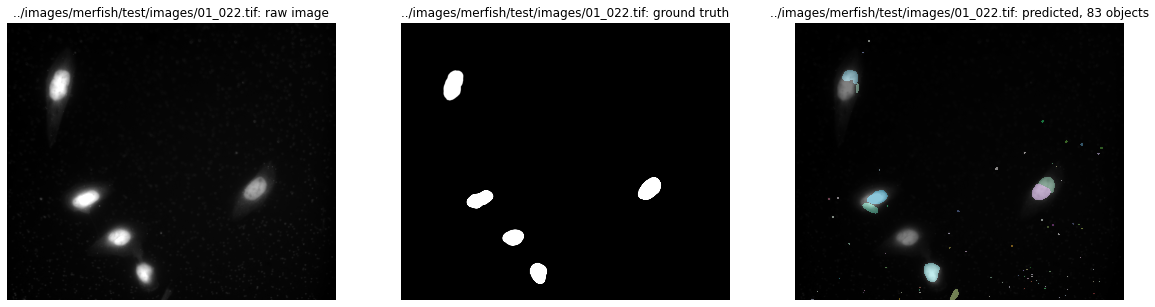

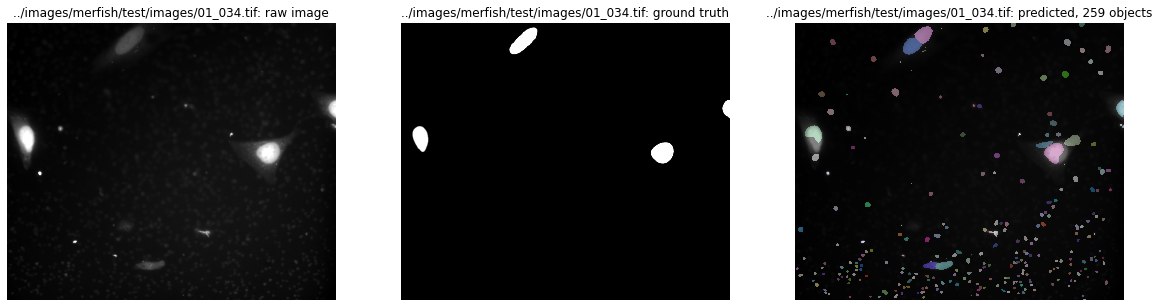

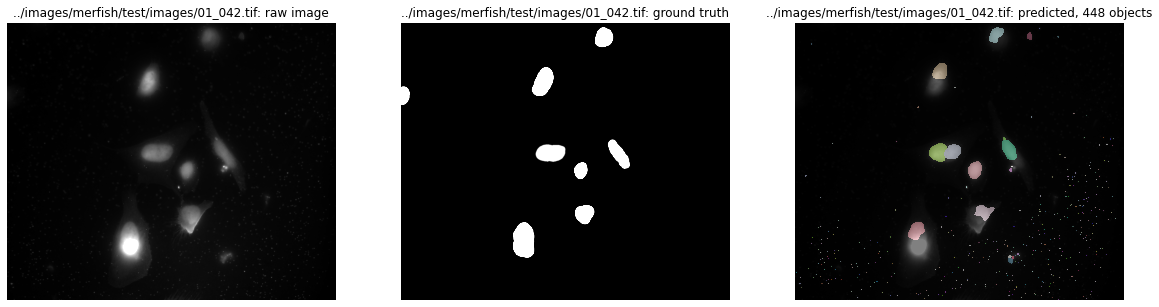

In [9]:
# Show all predictions
show_test_images(merfish_X_test, merfish_Y_test, pretrained_stardist_merfish_Y_pred, merfish_X_test_names)